In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#insert review_text3 as reviewing text 
pd.read_csv("imdb_labelled.txt", sep="\t", header=None, names=["review_text3", "value"])

,review_text3,value
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [16]:
imdb_df = pd.read_csv("imdb_labelled.txt", sep="\t", header=None, names=["review_text3", "value"]) 
imdb_df.columns = ['spam', 'negative']

In [17]:
imdb_df.columns

Index(['spam', 'negative'], dtype='object')

In [18]:
imdb_df

,spam,negative
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [20]:
#Looking at column with numeric values
imdb_df["negative"] = (imdb_df["negative"] == 0)

In [40]:
#bad_words = ["waste", "awful", "cheap", "problem", "mislead", "lousy", "disappointed", "junk", "unsatisfactory", "not"]
bad_words = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent','trial', 'XXX','not'] 
                                                                    #~add in 'trial' and 'XXX' for additional features] 
                                                

good_words = ["excellent", "great", "best", "amazing", "impressed", "good", "nice", "happy", "beautiful", "love"]

for word in bad_words:
    imdb_df[str(word)] = imdb_df["spam"].str.contains(str(word), case=False)

In [41]:
#Check for good words
for word in good_words:
    imdb_df[str(word)] = imdb_df["spam"].str.contains(str(word), case=False)

In [42]:
#look at columns again
imdb_df.columns

Index(['spam', 'negative', 'click', 'offer', 'winner', 'buy', 'free', 'cash',
       'urgent', 'trial', 'XXX', 'excellent', 'great', 'best', 'amazing',
       'impressed', 'good', 'nice', 'happy', 'beautiful', 'love', 'not'],
      dtype='object')

In [21]:
imdb_df.tail(30)

,spam,negative
718,Enough can not be said of the remarkable anima...,True
719,The art style has the appearance of crayon/pen...,True
720,"If you act in such a film, you should be glad ...",False
721,This one wants to surf on the small wave of sp...,False
722,If you haven't choked in your own vomit by the...,False
723,"Still, it makes up for all of this with a supe...",True
724,"Just consider the excellent story, solid actin...",True
725,"Instead, we got a bore fest about a whiny, spo...",False
726,Then I watched it again two Sundays ago (March...,True
727,It is a very well acted and done TV Movie.,True


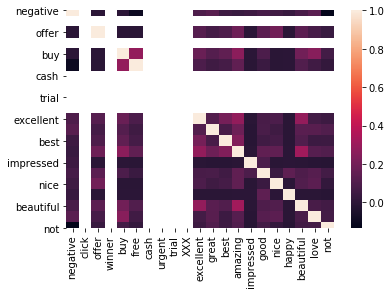

In [43]:
#Draw heatmap
sns.heatmap(imdb_df.corr())

In [44]:
#Review correlation of keywords
imdb_df.corr()

,negative,click,offer,winner,buy,free,cash,urgent,trial,XXX,...,great,best,amazing,impressed,good,nice,happy,beautiful,love,not
negative,1.000000,NaN,-0.002354,NaN,-0.001662,-0.092857,NaN,NaN,NaN,NaN,...,0.125411,0.051226,0.038556,0.050143,0.076256,0.057093,0.035432,0.081070,0.129780,-0.132252
click,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offer,-0.002354,NaN,1.000000,NaN,-0.003797,-0.006594,NaN,NaN,NaN,NaN,...,0.075083,0.098509,0.183256,-0.003797,0.135630,0.198904,-0.002683,0.136538,0.078437,0.037656
winner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy,-0.001662,NaN,-0.003797,NaN,1.000000,0.285572,NaN,NaN,NaN,NaN,...,0.116988,0.147926,0.263848,-0.002681,0.095776,-0.004656,-0.001894,0.199446,0.253307,0.070210
free,-0.092857,NaN,-0.006594,NaN,0.285572,1.000000,NaN,NaN,NaN,NaN,...,0.055051,0.075446,0.146916,-0.004656,0.040278,-0.008086,-0.003290,0.107805,0.058003,0.020930
cash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Find target of bad review in all rows
data = imdb_df.iloc[:, 2:]
target = imdb_df["negative"]

In [30]:
target.head()

0    False
1    False
2    False
3    False
4     True
Name: negative, dtype: bool

In [31]:
data.shape

(748, 19)

## User Bernoulli Classifier

In [32]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
model = bnb.fit(data, target)
y_pred = model.predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total of 748 points: 301


In [33]:
imdb_df[(imdb_df["negative"] != y_pred)& (imdb_df["negative"] == False)]

,spam,negative,click,offer,winner,buy,free,cash,urgent,trial,...,excellent,great,best,amazing,impressed,good,nice,happy,beautiful,love
19,The structure of this film is easily the most...,False,False,False,False,True,True,False,False,False,...,True,True,True,True,False,True,False,False,True,True
46,"I love Lane, but I've never seen her in a movi...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
50,The directing and the cinematography aren't qu...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
71,"This was a poor remake of ""My Best Friends Wed...",False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
72,"All in all, a great disappointment.",False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
103,It was a good thing that the tickets only cost...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
105,"This is a bad film, with bad writing, and good...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
109,I was left shattered from the experience of wa...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
111,I certainly do not mean this distinction in a ...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
136,"In fact, it's hard to remember that the part ...",False,False,True,False,False,False,False,False,False,...,True,True,True,True,False,True,True,False,True,True


### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[336,  26],
       [275, 111]])

## Evaluate Classifier for IMDB
Checking for class imbalance; it's almost evenly distributed dataset.

In [46]:
imdb_df["negative"].value_counts()


True     386
False    362
Name: negative, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Classifier 1

In [47]:
#classifier 1 (all features)
data = imdb_df.iloc[:, 2:]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.5666666666666667
Testing on Sample: 0.6029411764705882


array([0.56      , 0.57333333, 0.64      , 0.66666667, 0.61333333,
       0.58666667, 0.64      , 0.6       , 0.59459459, 0.54054054])

### Classifier 2

In [48]:
#classifier 2 (only negative words up to column 13)
data = imdb_df.iloc[:, 2:12]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.52
Testing on Sample: 0.5213903743315508


array([0.50666667, 0.50666667, 0.54666667, 0.53333333, 0.52      ,
       0.52      , 0.52      , 0.50666667, 0.51351351, 0.51351351])

### Classifier 3

In [49]:
#classifier 3 (only positive words beyond column 13)
data = imdb_df.iloc[:, 12:]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.54
Testing on Sample: 0.5909090909090909


array([0.56      , 0.56      , 0.61333333, 0.66666667, 0.58666667,
       0.56      , 0.65333333, 0.6       , 0.58108108, 0.52702703])

### Classifier 4

In [50]:
#classifier 4 (negative words except not)
data = imdb_df.iloc[:, 2:11]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.52
Testing on Sample: 0.5240641711229946


array([0.52      , 0.50666667, 0.54666667, 0.53333333, 0.52      ,
       0.52      , 0.52      , 0.50666667, 0.51351351, 0.51351351])

### Classifier 5
No 'love' in reviews

In [51]:
#classifier 5 (positive words without 'love')
data = imdb_df.iloc[:, 12:21]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print("With 20% Holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("Testing on Sample: " + str(bnb.fit(data, target).score(data, target)))
cross_val_score(bnb, data, target, cv=10)

With 20% Holdout: 0.54
Testing on Sample: 0.5855614973262032


array([0.56      , 0.54666667, 0.61333333, 0.65333333, 0.58666667,
       0.56      , 0.65333333, 0.58666667, 0.58108108, 0.51351351])

## Summary of Results

1) Our classifiers' level of overfit:
Reviewing the holdout groups versus the testing samples, in most cases there is a difference of around .02. This seems like a negligible degree of discrepancy. However, when using folds in our cross validation, the possibility of overfitting became more apparent. For example, when looking at all features, the lowest percent accuracy is .8 and the lowest is .62. Overall, the best accuracy is showing up in the first fold, and this is probably because we based our features on the "head" of the dataset.

2) Best Performer, Why? 
The classifier with the best accuracy is classifier 3 (only positive words). The classifier that shows the least evidence of overfitting is classifier 4 (negative words except not). The classifier with the optimal combination of accuracy and lack of overfitting is classifier 3 (only positive words).

3) Most impactful to performance:
In general, positive words as a whole had a stronger impact on the prediction accuracy than did negative words as a whole. The single feature that seemed to have the strongest correlation with the prediction of the negative review was the presence of the word "not." When we ran the model with all negative words except "not," the percent accuracy dropped by 8% =(.60 (classifier 1) - .52 (classifier 4)).